# Homework 1

<img src="svm.png">

Try to generate datasets like this, fit SVM on each of them and find best regularization parameter and best kernel for each (use CV).

Dataset settings
- 2 features
- not more than 10k points
- you can either try generating from distributions, and maybe removing some elements after 
- or you can just generate by some functions, this would be easier, but it is OK

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection._search import GridSearchCV

In [2]:
dim = 1000

In [3]:
# X1, y1 = make_blobs(
#     200, 2, centers=2, random_state=20, center_box=(-1, 1), cluster_std=0.1
# )
np.random.seed(67)

x11 = np.random.randn(1000, 2)
x12 = np.random.randn(1000, 2) + np.array([7.5, 0])

X1 = np.vstack((x11, x12))

y1 = np.hstack((np.ones(dim), -np.ones(dim)))

In [4]:
np.random.seed(67)
x21 = np.random.randn(dim, 2) + np.array([-1, 1])
x22 = np.random.randn(dim, 2) + np.array([1, -6])
X2 = np.vstack((x21, x22))

y2 = np.hstack((np.ones(dim), -np.ones(dim)))

In [5]:
def find_best_C_and_kernel(_X, _y, name, linspace=(0, 1), C=None, kernel=None, plot_line=True):
    X_train, X_test, y_train, y_test = train_test_split(_X, _y)

    if not C and not kernel:
        svc = SVC()
        svc.fit(X_train, y_train)

        params = {
            "C": [
                1e-5,
                1e-4,
                1e-3,
                1e-2,
                0.0003,
                0.0002,
                0.1,
                0.2,
                0.3,
                0.4,
                # 0.5,
                # 1,
                # 2,
                # 3,
                # 4,
                # 5,
                # 10,
                # 20,
                # 30,
                # 40,
                # 50,
                # 100,
            ],
            "kernel": ["linear", "poly", "rbf", "sigmoid"],
        }

        Regressor = GridSearchCV(svc, params, scoring="neg_mean_squared_error", cv=5)
        Regressor.fit(X_train, y_train)
        print(f"best parameter for {name}: ", Regressor.best_params_)

        current_svc = SVC(**Regressor.best_params_)
    else:
        current_svc = SVC(C=C, kernel=kernel)

    current_svc.fit(X_train, y_train)
    print(f"Score for {name}:", current_svc.score(X_test, y_test))

    fig, ax = plt.subplots()
    for i, y_i in enumerate(y_train):
        if y_i > 0:
            c = "cyan"
            marker = "o"
        else:
            c = "magenta"
            marker = "^"
        ax.scatter(X_train[i, 0], X_train[i, 1], c=c, marker=marker, s=30)

    if kernel == "linear":
        np.random.seed(67)
        w = current_svc.coef_[0]
        b = current_svc.intercept_[0]
        x_points = np.linspace(*linspace)
        y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
        plt.plot(x_points, y_points, c='r')

    else:
        x_min, x_max = _X[:, 0].min() - 1, _X[:, 0].max() + 1
        y_min, y_max = _X[:, 1].min() - 1, _X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                             np.arange(y_min, y_max, 0.2))

        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = current_svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        plt.scatter(_X[:, 0], _X[:, 1], c=_y, cmap=plt.cm.coolwarm)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())

    fig.tight_layout(h_pad=0.5)

    ax.set_title(name)

Score for DataSet1: 1.0


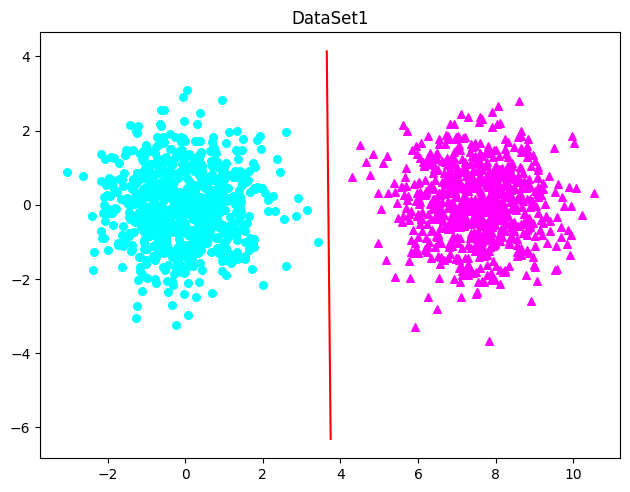

In [22]:
find_best_C_and_kernel(X1, y1, "DataSet1", (3.65, 3.75), C=0.0001, kernel="linear")

Score for DataSet2: 1.0


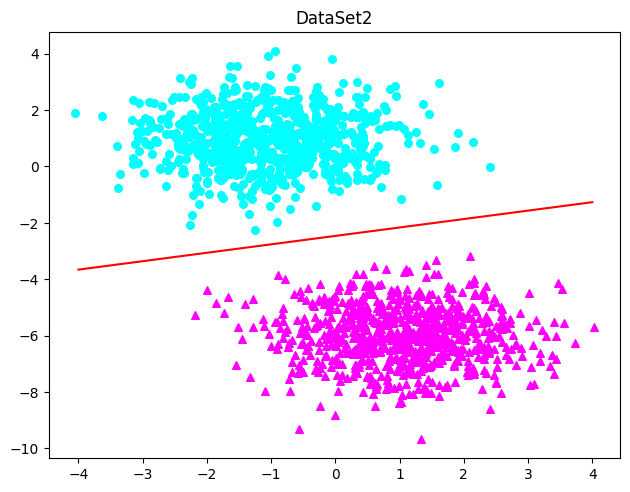

In [7]:
find_best_C_and_kernel(X2, y2, "DataSet2", (-4, 4), C=0.0001, kernel="linear")

In [8]:
np.random.seed(67)

x31 = np.random.randn(dim, 2)
x32 = np.random.randn(dim, 2) + np.array([5, 0])

X3 = np.vstack((x31, x32))

y3 = np.hstack((np.ones(dim), -np.ones(dim)))

Score for DataSet4: 0.986


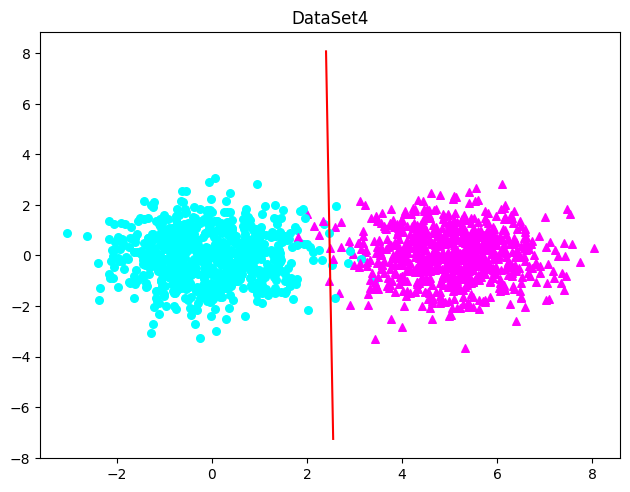

In [18]:
find_best_C_and_kernel(X3, y3, "DataSet4", (2.4, 2.55), C=0.3, kernel="linear")

In [10]:
np.random.seed(67)
threshold = 0.5
dim = 1000
x41 = np.random.randn(dim, 2)
x41 = x41[x41[:, 0] ** 2 + x41[:, 1] ** 2 > threshold]
x41 = np.unique(x41, axis=0)

x41_removable_1 = x41[x41[:, 1] < -threshold]
x41_removable_0 = x41[x41[:, 0] < -threshold]
x41_removable = np.vstack((x41_removable_0, x41_removable_1))
x41_removable = np.unique(x41_removable, axis=0)

for i in x41:
    if i in x41_removable[:, :]:
        index = np.argwhere(x41 == i)[0][0]
        x41 = np.delete(x41, index, 0)

x42 = np.random.randn(dim, 2)
x42 = x42[x42[:, 0] ** 2 + x42[:, 1] ** 2 < threshold - 0.2]
x42 = np.unique(x42, axis=0)

X4 = np.vstack((x41, x42))

y4 = np.hstack((np.ones(x41.shape[0]), -np.ones(x42.shape[0])))

Score for DataSet4: 1.0


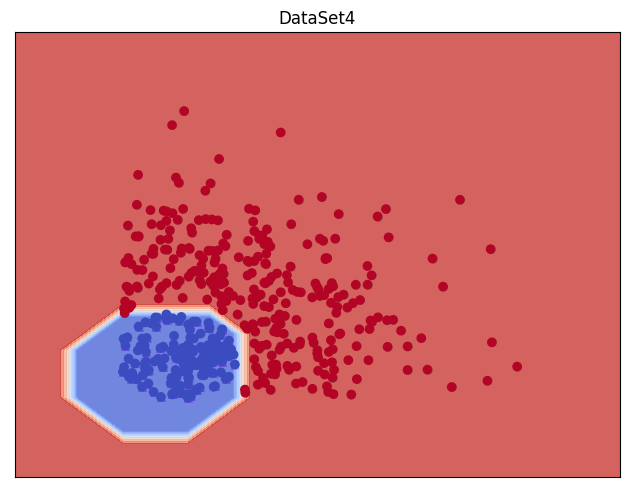

In [11]:
find_best_C_and_kernel(X4, y4, "DataSet4", (2.45, 2.5), C=0.2, kernel="rbf")

# Homework 2

Write a function is_kernel_function(func), which will return True if given function is a kernel function and False if it is not.

In [12]:
def is_semi_positive_definite(X):
    return np.all(np.linalg.eigvalsh(X) >= -1e-7)


def is_kernel_function(func):
    np.random.seed(67)
    m = 1000
    x1 = np.random.randn(m, 2)
    x2 = np.random.randn(m, 2) + np.array([7.5, 0])
    X = np.vstack((x1, x2))
    n = X.shape[0]

    K_matrix = np.ndarray(shape=(n, n))
    for i in range(n):
        for _j in range(n - i):
            j = i + _j
            K_matrix[i, j] = func(X[i], X[j])
            if i != j:
                K_matrix[j, i] = func(X[j], X[i])
                if K_matrix[i, j] != K_matrix[j, i]:
                    print("The matrix is not symmetric")
                    return False

    if not is_semi_positive_definite(K_matrix):
        print("The matrix is not semi-positive definite")
        return False

    return True